<a href="https://colab.research.google.com/github/ismihann/Kurs-Projelerim/blob/main/LineerRegresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()
#google colab da veri seti yükleme bölümünü import ettik

Saving Salary_dataset.csv to Salary_dataset.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("Salary_dataset.csv")

In [5]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


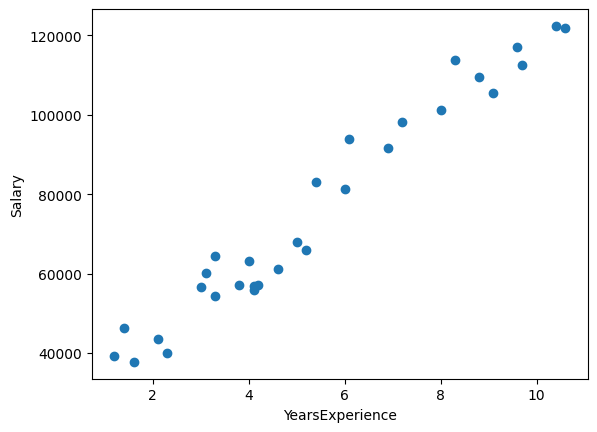

In [6]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [7]:
X=df["YearsExperience"]
y=df["Salary"]
type(X)
#X y ve series şeklinde yani tek değerli y için bu gayet doğal çünkü elimizde tek sonuç olur ama X yani girdiler içinde ikili üçlü arraylerde olabilir yani farklı özelliklerde olabilir

pandas.core.series.Series

In [8]:
type(y)

pandas.core.series.Series

In [9]:
X=df[["YearsExperience"]]
type(X)
#Bunu düzeltmek için bir köşeli parantez daha koyuyoruz

pandas.core.frame.DataFrame

In [10]:
#TRAİN-TEST SPLİT METHODU
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [12]:
y_test

,Salary
16,66030.0
14,61112.0
27,112636.0
22,101303.0
19,93941.0
18,81364.0


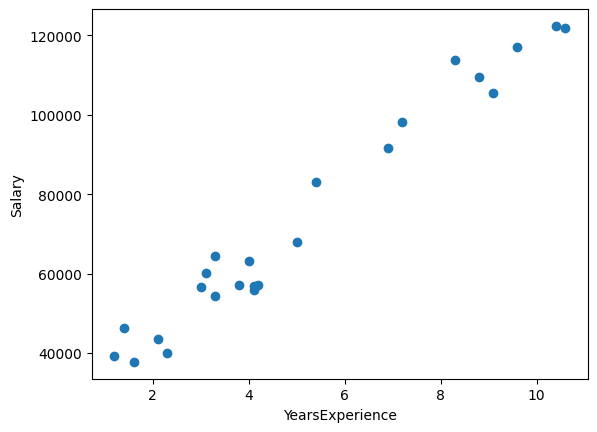

In [13]:
plt.scatter(X_train,y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

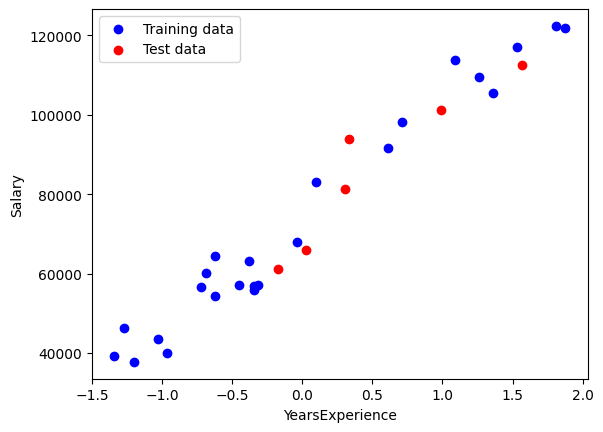

In [34]:
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_test, y_test, color="red", label="Test data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [14]:
#Standardize the data set
#farklı sayı versiyonlarında kolonlar olması bilgisayarın kafasını karıştırır bir kolonda 1000li veriler bir kolonda 10 lu veriler bunları ortak bir sayı sisteminde birleştirmeye çalışıyoruz örnek her ikisini 1000e bölmek gibi 1 ve 0.1 olur daha yakın
from sklearn.preprocessing import StandardScaler

In [15]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [16]:
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#fit() kısmı: Scaler X_train’in ortalamasını ve standart sapmasını hesaplar.
#transform() kısmı: Bu ortalama ve standart sapmayı kullanarak X_train’i standartlaştırır.
#Sonuç: X_train artık ortalaması 0, standart sapması 1 olacak şekilde normalize edilmiş olur.
#Önemli: Fit yalnızca eğitim verisine yapılır. Çünkü test verisi üzerinde modelin gelecekteki davranışını ölçüyoruz, onun istatistiklerini öğrenmemeliyiz.

In [18]:
X_train

array([[-1.27214822],
       [-1.20369182],
       [ 1.87684648],
       [-0.69026877],
       [-1.0325508 ],
       [ 1.53456445],
       [ 1.36342343],
       [-0.45067134],
       [-0.96409439],
       [ 0.61040296],
       [-0.38221494],
       [ 1.26073882],
       [-0.31375853],
       [ 0.09697991],
       [-0.0399329 ],
       [ 1.80839008],
       [-0.34798673],
       [-0.62181236],
       [-1.34060463],
       [ 1.08959781],
       [-0.72449697],
       [-0.34798673],
       [ 0.71308757],
       [-0.62181236]])

In [19]:
#LİNEAR REGRESSİON()
from sklearn.linear_model import LinearRegression

In [20]:
regression=LinearRegression()

In [21]:
regression.fit(X_train,y_train)
#.fit(X_train, y_train) → model X_train ve y_train verilerini kullanarak öğrenir

LinearRegression()

In [22]:
print("Coefficien:",regression.coef_)
print("İntercept:",regression.intercept_)
#coefficien =eğim
#intercept=sabit

Coefficien: [27625.08280112]
İntercept: 73488.91666666667


In [ ]:
#y=27625+73488x

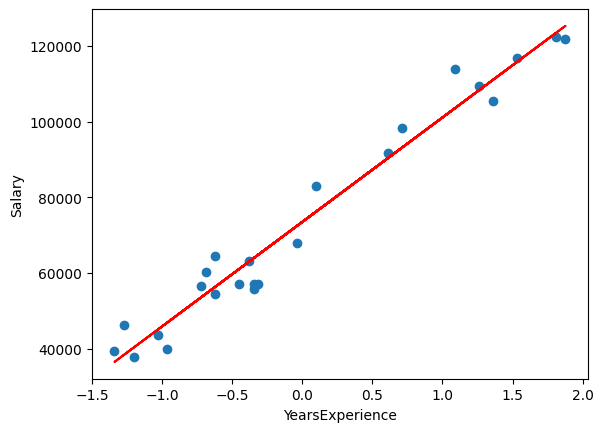

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()
#Burada kırmızı çizgi, modelin öğrendiği doğrusal ilişkiyi göstermek için.

In [ ]:
#x=20 ise y=?

In [26]:
regression.predict([[3]])
#çok büyük sayı verdi eğerki istediğimiz bu değilse

array([156364.16507001])

In [27]:
regression.predict(scaler.transform([[3]]))
#eğitimdeki test sonuçlarına benzer hale getirdik

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([53474.62786384])

In [28]:
y_pred_test=regression.predict(X_test)
#modeli eğittik sıra tahmin aşamasında model x_test verilerini hiç görmedi bu verilerden tahmin yürütüyor

In [29]:
y_test
#gerçek değerler

,Salary
16,66030.0
14,61112.0
27,112636.0
22,101303.0
19,93941.0
18,81364.0


In [35]:
y_pred_test
#tahmin değerleri

array([ 74276.88079276,  68603.53908487, 116826.94360193, 100752.47542958,
        82786.8933546 ,  81841.33640328])

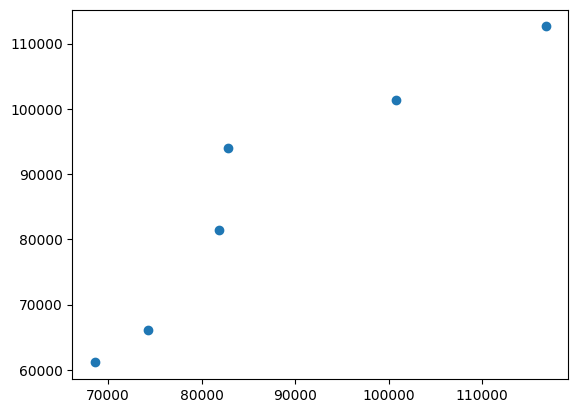

In [30]:
plt.scatter(y_pred_test,y_test)
#tahmin ve gerçek değerlerin kesşimini bakıyor eğerki noktalar bir doğru geçicek kadar düzgün ise başarılı bir model oluşturmuş oluruz
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

In [33]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

44440538.5577256
5351.888516445368
6666.373718726366
